In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Convolution2D,Activation,Dropout,ZeroPadding2D
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
def VGG19():
  model = Sequential()
  model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
  model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=128, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=256, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=256, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=256, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=256, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2),name='vgg19'))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  return model

In [ ]:
model=VGG19()
model.summary()
Vgg19 = Model(inputs=model.input, outputs=model.get_layer('vgg19').output)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [ ]:
Vgg19.load_weights("/content/drive/MyDrive/Models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

opt = SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

mc = ModelCheckpoint("vgg19_best_model_1.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 317s 6s/step - loss: 1.4208 - accuracy: 0.3320 - val_loss: 1.1184 - val_accuracy: 0.3612
Epoch 2/150
56/56 [==============================] - 41s 726ms/step - loss: 1.3561 - accuracy: 0.3432 - val_loss: 1.0837 - val_accuracy: 0.4075
Epoch 3/150
56/56 [==============================] - 41s 732ms/step - loss: 1.3177 - accuracy: 0.3561 - val_loss: 1.0720 - val_accuracy: 0.4163
Epoch 4/150
56/56 [==============================] - 38s 665ms/step - loss: 1.3376 - accuracy: 0.3516 - val_loss: 1.0656 - val_accuracy: 0.4053
Epoch 5/150
56/56 [==============================] - 43s 771ms/step - loss: 1.3332 - accuracy: 0.3354 - val_loss: 1.0611 - val_accuracy: 0.4185
Epoch 6/150
56/56 [==============================] - 40s 702ms/step - loss: 1.3191 - accuracy: 0.3661 - val_loss: 1.0571 - val_accuracy: 0.4185
Epoch 7/150
56/56 [==============================] - 43s 772ms/step - loss: 1.3002 - accuracy: 0.3812 - val_loss: 1.0533 - val_accuracy: 0

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[121   9  19]
 [  4 108   1]
 [ 17   1 174]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.85      0.81      0.83       149
             Healthy       0.92      0.96      0.94       113
        Rust disease       0.90      0.91      0.90       192

            accuracy                           0.89       454
           macro avg       0.89      0.89      0.89       454
        weighted avg       0.89      0.89      0.89       454



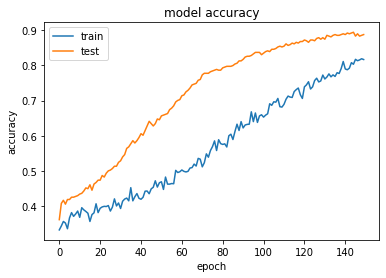

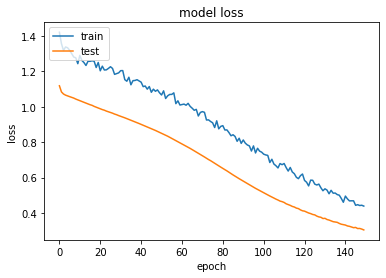

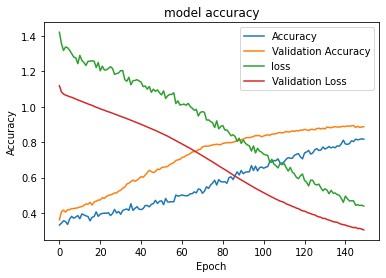

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
Vgg19.load_weights("/content/drive/MyDrive/Models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

opt = Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

mc = ModelCheckpoint("vgg19_best_model_1.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 566s 10s/step - loss: 1.5408 - accuracy: 0.3141 - val_loss: 1.1832 - val_accuracy: 0.3304
Epoch 2/150
56/56 [==============================] - 36s 632ms/step - loss: 1.4103 - accuracy: 0.3376 - val_loss: 1.1116 - val_accuracy: 0.3194
Epoch 3/150
56/56 [==============================] - 40s 718ms/step - loss: 1.3773 - accuracy: 0.3348 - val_loss: 1.0998 - val_accuracy: 0.3877
Epoch 4/150
56/56 [==============================] - 41s 720ms/step - loss: 1.3485 - accuracy: 0.3644 - val_loss: 1.0985 - val_accuracy: 0.3987
Epoch 5/150
56/56 [==============================] - 41s 726ms/step - loss: 1.2984 - accuracy: 0.3829 - val_loss: 1.0972 - val_accuracy: 0.4097
Epoch 6/150
56/56 [==============================] - 41s 719ms/step - loss: 1.2959 - accuracy: 0.3672 - val_loss: 1.0936 - val_accuracy: 0.4119
Epoch 7/150
56/56 [==============================] - 41s 729ms/step - loss: 1.3429 - accuracy: 0.3326 - val_loss: 1.0907 - val_accuracy: 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[118  15  16]
 [  4 109   0]
 [ 13   0 179]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.87      0.79      0.83       149
             Healthy       0.88      0.96      0.92       113
        Rust disease       0.92      0.93      0.93       192

            accuracy                           0.89       454
           macro avg       0.89      0.90      0.89       454
        weighted avg       0.89      0.89      0.89       454



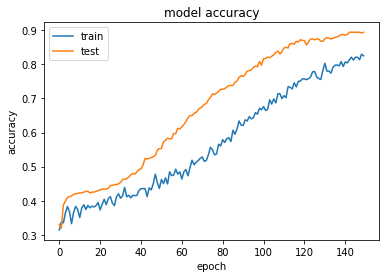

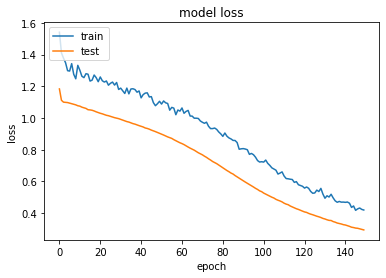

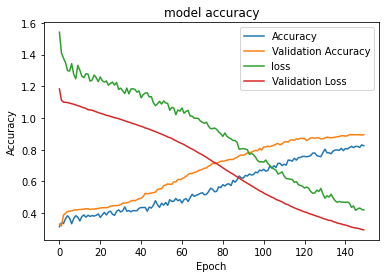

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()